Import Astropy and Numpy Libraries for Data Visualization

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style
from tqdm import tqdm
import os

plt.style.use(astropy_mpl_style)

Extracting the data from the Fits files

In [6]:
even_numbers = [f'{num:05}' for num in range(0, 1001, 2)] # I did this cause the valid snapshots which produced images were all even numbered i.e they were of the format snapshot101_X where X is the 5 digit format of even numbers
valid_image_data = []

for i in tqdm(even_numbers, desc="Getting Array ready"):
    fits_image_filename = f"job_{i}/RT.fits.gz"
    if os.path.exists(fits_image_filename):

        try:
            image_data = fits.getdata(fits_image_filename, ext=0)
            valid_image_data.append([i,image_data]) #the reason why I did this (append both i and the image data) is to be able to retrace where particular image data came from. Turns out that it wasn't very useful here
        # Continue processing with the data if no error occurred
        except Exception as e:
            print(f"Error reading FITS file {fits_image_filename}: {e}")
        # Handle the error as needed
        continue  # Continue to the next iteration
        
        
    else:
        print(f"The directory {fits_image_filename} does not exist.")
    
    


    


Getting Array ready:   0%|          | 0/501 [00:00<?, ?it/s]

Getting Array ready:  21%|██        | 104/501 [00:12<00:37, 10.49it/s]

The directory job_00204/RT.fits.gz does not exist.


Getting Array ready:  30%|██▉       | 149/501 [00:18<00:36,  9.58it/s]

Error reading FITS file job_00294/RT.fits.gz: Empty or corrupt FITS file


Getting Array ready:  32%|███▏      | 161/501 [00:19<00:27, 12.34it/s]

Error reading FITS file job_00316/RT.fits.gz: Empty or corrupt FITS file
The directory job_00318/RT.fits.gz does not exist.
Error reading FITS file job_00322/RT.fits.gz: Empty or corrupt FITS file


Getting Array ready: 100%|██████████| 501/501 [01:09<00:00,  7.19it/s]


Each element in this 'valid_image_data' array is an array of 2 elements, the first shows the snaphot ID and the second is the actual image data

In [7]:
valid_image_data[0][1].shape

(4, 1, 4, 600, 600)

These are just standard imports and settings for visualization of the Eigen Images

In [2]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt       
from matplotlib import rcParams       # import to change plot parameters
from matplotlib import cm             # imports colormaps
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 
# we will use the line above to make the big plot of the PCA components below

import numpy as np                    # imports library for arrays

# Below I import my own library. On my laptop they are located in home+'/Dropbox/research/master_code'
# Change that line of code so that it matches the location of the files on your laptop
import sys
from os.path import expanduser
home = expanduser("~")
sys.path.append(home+'/Documents/UGA_Research/forJuvis')
from my_func import * # my module with some helpful functions
from my_plot import * # my module with some plotting functions
from my_pca  import * # my module with some PCA functions

textwidth   = 7.1014
columnwidth = 3.39441
font        = 12

The data extraction I did earlier on was not compatible with the format needed by Dr. Lia's code, so I had to do some reshaping here

Here I calculated the various Eigen Images and Eigen values

In [21]:
eigen_values, eigen_vectors = diy_PCA(image_cube)

np.shape(eigen_values), np.shape(eigen_vectors)

((496,), (496, 600, 600))

Plotting the various Weigths of the PCA Components

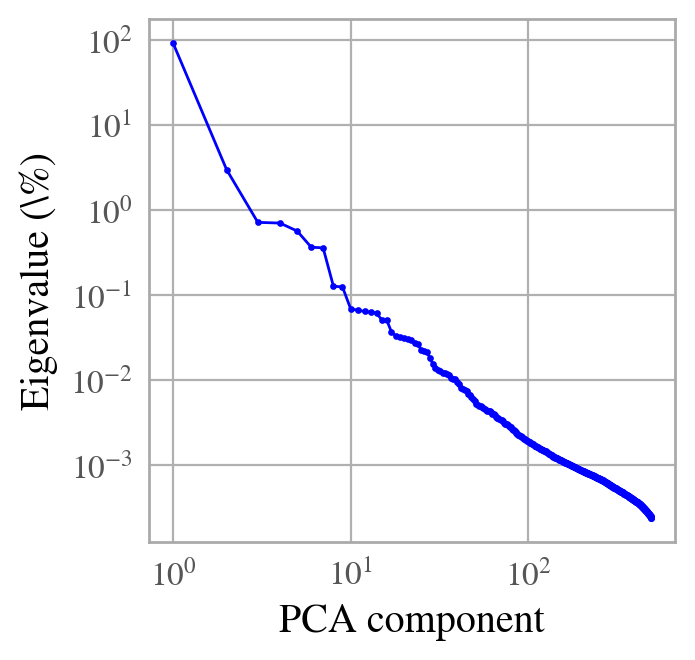

In [22]:
num=496 # number of eigenvalues you want to include in the plot, 1024 max
fig,(ax1) = plt.subplots(1,1)    
fig.set_size_inches(columnwidth,columnwidth)
ax1.scatter(np.arange(num)+1, eigen_values[:num]*100.,s=2, color='b')# multiply by 100 to make it a percent
ax1.loglog(np.arange(num)+1, eigen_values[:num]*100.,lw=1, color='b')# multiply by 100 to make it a percent
ax1.set_xlabel('PCA component')
ax1.set_ylabel('Eigenvalue (\%)')
ax1.tick_params(axis='both', which='both', labelsize=font,width=.7,direction='in', right=True, top=True,color='k') 

# fig.savefig('PCA_eigenvalues.pdf', bbox_inches='tight') # this line saves the figure to a file, uncomment if you'd like to do that


Finally we can View the Eigen Images...

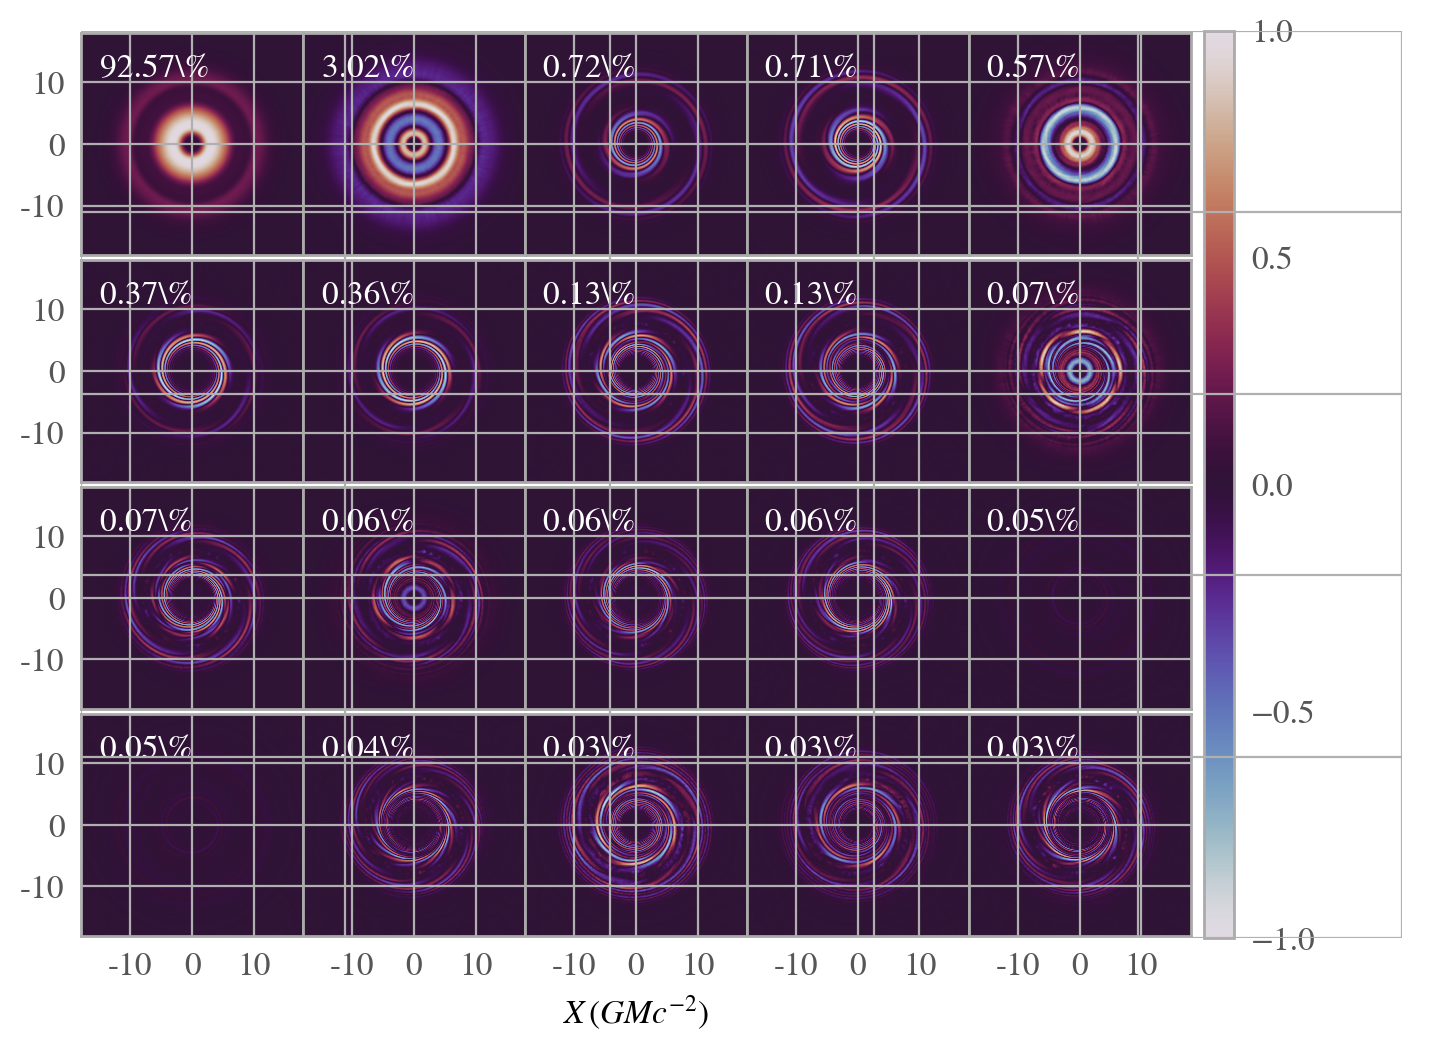

In [23]:
fig,axes = plt.subplots(4,5,sharey=True,sharex=True)    
fig.set_size_inches(textwidth*1.2,textwidth*.83)
plt.subplots_adjust(wspace=0,hspace=0)
cmap='twilight' # I use the "twilight" colormap for the PCA components because 
# the PCA components can be both positive and negative and "twilight" goes 
# from blue to black to red in a nice way so I can make blue negative, 
# red positive and black zero. 

eigen_text=True

# I copied this from another jupyter notebook and I had named the PCA 
# vectors and values something else so I added the hack below
eigen = eigen_values
comps = eigen_vectors


k = 0
for ax in axes.flat:
    
    # The if statement below is because there is an inherent 
    # degeneracy between a PCA components and the negative of 
    # that same PCA component. So that our work is reproducible
    # we choose to display the PCA components so that they all 
    # have a positive total flux to remove this degeneracy.
    if np.sum(comps[k,:,:])<0.0:
        factor=-1.
    else:
        factor=1.
    
    # Actually plot the PCA component below
    im = plot_image(factor*comps[k,:,:]/(np.max(np.abs(comps[k,:,:]))),fig=fig,ax1=ax,colorbar=False,norm=False,lim_lin=np.array([-1,1]),x_label=False,y_label=False,font=font,zoom=False,cmap=cmap)
    
    # Below we add the eigenvalue to the top of each panel
    if eigen_text==True:
        if eigen[0]*100 < .2: ax.text(-15,11, str(np.round(eigen[k]*100, decimals=4))+'\% ', fontsize=font,color='w')
        else:                 ax.text(-15,11, str(np.round(eigen[k]*100, decimals=2))+'\% ', fontsize=font,color='w')

    # Everything below is for formatting the figure so it looks nice and has axes labels
    ax.tick_params(axis='both', which='both', labelsize=font,width=1,direction='in', right=True, top=True,color='w') 

    ax.set_xlim([-18,18])
    ax.set_ylim([-18,18])
    majorLocator   = MultipleLocator(10)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator   = MultipleLocator(5)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_minor_locator(minorLocator)
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.tick_params(axis='both', which='both', labelsize=font,width=1,direction='in', right=True, top=True,color='w') 

    
    if k==17: ax.set_xlabel(r'$X\,(GMc^{-2})$',fontsize=font)
    k+=1
cbar1 = fig.colorbar(im, ax=axes.ravel().tolist(), pad = 0.01,aspect=30, ticks=[-1,-.5,0,.5,1])
cbar1.ax.tick_params(labelsize=font, color='w', direction='in')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, color='w')
#plt.ylabel(r'$Y\,(GMc^{-2})$',fontsize=font)


# fig.savefig('PCA_comps.pdf', bbox_inches='tight') # Use this to save the figure if you want



Here I tried a reconstruction with 60 PCA components. Lower Than that, the reconstruction missed some features.

(0.0, 1.0, 0.0, 1.0)

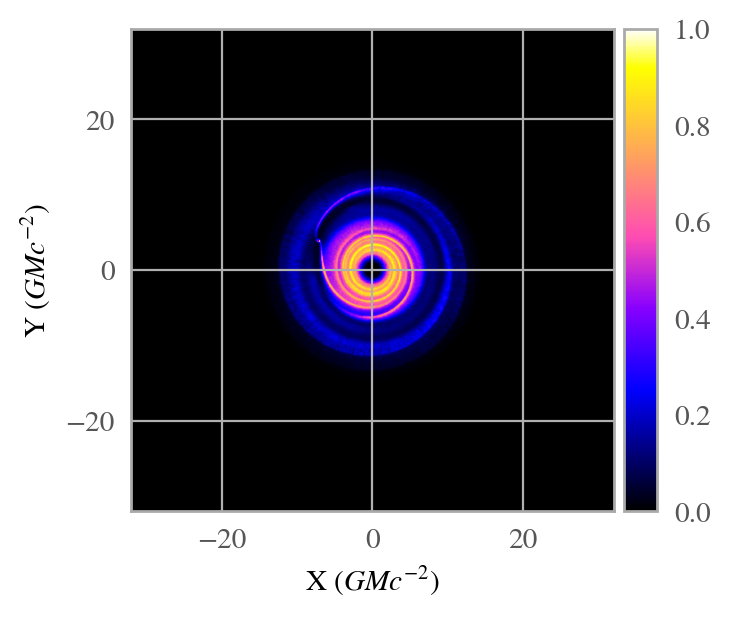

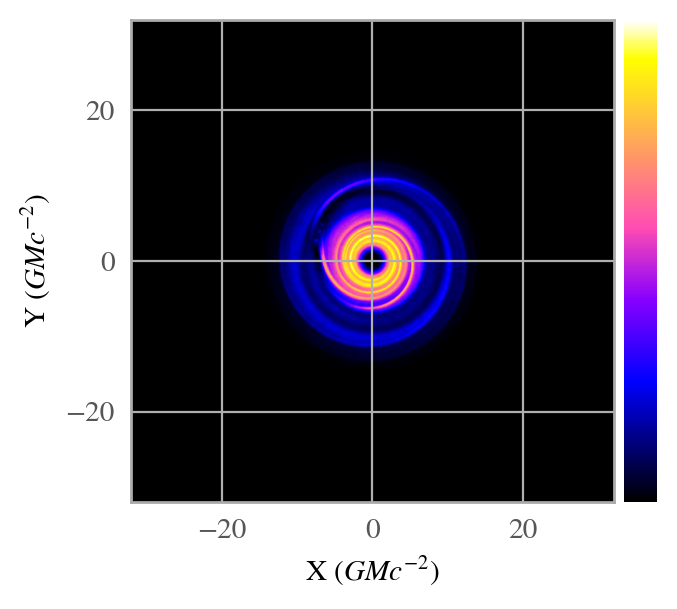

In [28]:
num = 60 # number of PCA components I will use for the projection
x   = 600 # number of pixels in each direction of the images
which_snap=100

# amps has the amplitude of the first 20 PCA components needed for the linear combination
amps = get_amps(comps[:num,:,:], image_cube[which_snap,:,:])
# the get_amps() function takes in the components taht you want to use for the projection and the image

# now actually create the linear combination
amps        = amps.repeat(x*x).reshape(((num,x,x))) # here I make the amps the same 
# size as the PCA components to avoid a for loop, but you could also have looped throught 
# each of the first N PCA components and multiplied them by the nth amplitude in amps.
# this is called vectorization, and is a common way to speed up python code since the
# numoy library performs the for loops in C instead of python, which is faster.

projection  = np.sum(comps[:num,:,:]*amps, axis=0) # here we multiply the PCA 
# components by the amplitudes and then sum them

plot_image(image_cube[which_snap,:,:],zoom=False) # plotting the original image
plot_image(projection,zoom=False) # plotting the projection of the original image onto "num" PCA components

#remove axis
plt.axis('off')